# Kiva Loans

Kiva provides financial services to poor and financially excluded people around the world. In order to best fulfill their mission, they need to evaluate potential borrowers' poverty levels and inform lenders.

A key issue involved in this process is localization. Most information about borrowers is at a high, generalized level. However, it would be most useful for Kiva to have information at a much more granular level.

This notebook begins to explore the provided Kiva datasets.

### Packages

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Loans Data

Importing and First Exploration

In [2]:
loans = pd.read_csv('./data/kiva_loans.csv')

In [3]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [4]:
loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


Loans are between \$25 and \$100,000.

622875


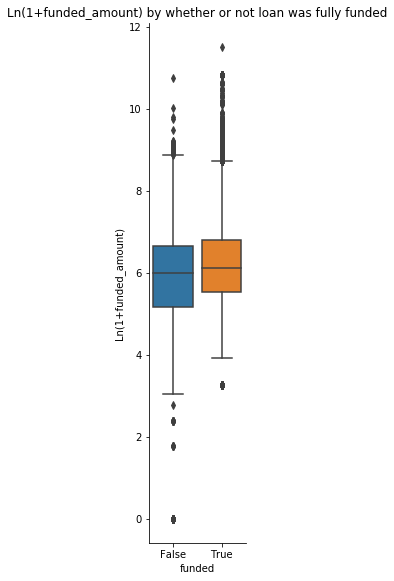

In [5]:
loans = loans.assign(funded=loans['funded_amount']==loans['loan_amount'])

sns.factorplot(kind='box',
               y=np.log(1+loans['funded_amount']),
               x='funded',
               data=loans,
               size=8,  
               aspect=1.5,
               legend_out=False)
plt.title('Ln(1+funded_amount) by whether or not loan was fully funded')
plt.ylabel('Ln(1+funded_amount)')
print(np.sum(loans['funded_amount']==loans['loan_amount']))


622875


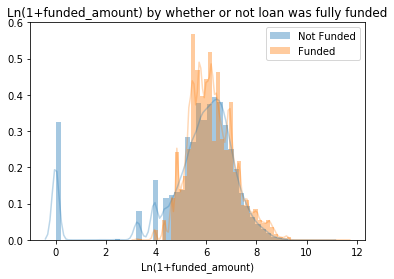

In [6]:
sns.distplot(np.log(1+loans.loc[~loans['funded'],'funded_amount']),
            label='Not Funded',kde_kws={'alpha': .3})     
sns.distplot(np.log(1+loans.loc[loans['funded'],'funded_amount']),
            label='Funded',kde_kws={'alpha': .3})
plt.title('Ln(1+funded_amount) by whether or not loan was fully funded')
plt.legend()
plt.xlabel('Ln(1+funded_amount)')
plt.ylim(0,0.6)
print(np.sum(loans['funded_amount']==loans['loan_amount']))

What sectors are common for these loans?

Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: sector, dtype: int64


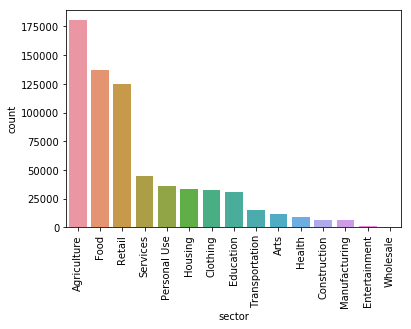

In [7]:
def plot_counts(col,data):
    counts = data[col].value_counts()
    print(counts)
    sns.countplot(x=col, data=data
                  ,order=counts.iloc[:20].index,
                  dodge=True
                 )
    plt.xticks(rotation=90)

plot_counts('sector', loans)

Mostly agriculture, food, and retail. This makes sense given the microloans are probably to help people in their jobs in poor areas. From the first couple of lines of loans, we saw that "Food" often represents more than just food for the borrower to eat: the first row shows someone buying food "to sell".

Location is a key determinant of poverty level. Though we want to get as localized as possible. Let's start by looking at country.

Philippines                         160441
Kenya                                75825
El Salvador                          39875
Cambodia                             34836
Pakistan                             26857
Peru                                 22233
Colombia                             21995
Uganda                               20601
Tajikistan                           19580
Ecuador                              13521
Paraguay                             11903
Nicaragua                            11781
India                                11237
Vietnam                              10843
Nigeria                              10136
Bolivia                               8806
Lebanon                               8792
Armenia                               8631
Palestine                             8167
Samoa                                 7396
Guatemala                             7310
Rwanda                                6735
Mali                                  6639
Honduras   

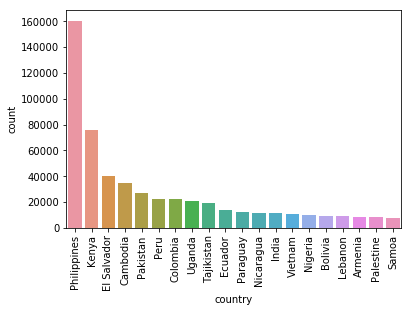

In [8]:
plot_counts('country', loans)

These countries do make sense. Interesting that the Phillipines has many more loans than the other countries funded. In fact, the Phillipines and Kenya make up over 35% of all the loans in the dataset. If this set of loans is representative of all the loans at large for Kiva, it might make sense to focus the localization on these two counties because it would have the largest impact on the current state of loans.

Let's start digging more into the region information.

## Regions

First load up the data and take a look.

In [9]:
regions = pd.read_csv('./data/kiva_mpi_region_locations.csv')
regions.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [10]:
regions.describe()

,MPI,lat,lon
count,984.000000,892.000000,892.000000
mean,0.211330,9.169710,16.635888
std,0.183621,16.484531,61.234566
min,0.000000,-34.947896,-122.747131
25%,0.053000,-1.027901,-12.819854
50%,0.155000,11.211379,26.419389
75%,0.341500,18.084292,47.019436
max,0.744000,49.264748,138.581284


In [11]:
regions.sort_values(by=['MPI'], ascending=False).head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
888,"Lac, Chad",TCD,Chad,Lac,Sub-Saharan Africa,0.744,"(18.3281428, -77.2405153)",18.328143,-77.240515
900,"Wadi Fira, Chad",TCD,Chad,Wadi Fira,Sub-Saharan Africa,0.709,"(15.0892416, 21.4752851)",15.089242,21.475285
61,"Est, Burkina Faso",BFA,Burkina Faso,Est,Sub-Saharan Africa,0.698,"(12.4365526, 0.9056623)",12.436553,0.905662
898,"Sila, Chad",TCD,Chad,Sila,Sub-Saharan Africa,0.697,"(12.13074, 21.2845025)",12.130740,21.284502
887,"Kanem, Chad",TCD,Chad,Kanem,Sub-Saharan Africa,0.696,"(12.90616, 105.2194808)",12.906160,105.219481


Join this region info back to the loans

In [12]:
loans = pd.merge(loans, regions, how='inner',
        on=['country','region']
        # ,validate='many_to_one'
        )
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,repayment_interval,date,funded,LocationName,ISO,world_region,MPI,geo,lat,lon
0,653359,600.0,600.0,Machinery Rental,Services,to invest in working capital and to maintain g...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
1,653373,1000.0,1000.0,Grocery Store,Food,to invest in working capital and to provide hi...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
2,653364,250.0,250.0,Fuel/Firewood,Retail,to buy firewood to offer to her customers,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
3,653367,175.0,175.0,Food Market,Food,to invest in working capital and stock up her ...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
4,653396,800.0,800.0,Clothing Sales,Clothing,to invest in working capital to stock their bu...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
5,653402,800.0,800.0,Grocery Store,Food,to invest in working capital and to supply her...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
6,653398,400.0,400.0,Clothing Sales,Clothing,To invest in working capital and stock her clo...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
7,653400,1925.0,1925.0,Grocery Store,Food,to stock her store.,NI,Nicaragua,Leon,NIO,...,irregular,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
8,653395,250.0,250.0,Clothing Sales,Clothing,to invest in working capital and to stock her ...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569
9,653390,800.0,800.0,Grocery Store,Food,to invest in working capital and stock up her ...,NI,Nicaragua,Leon,NIO,...,monthly,2014-01-02,True,"Leon, Nicaragua",NIC,Latin America and Caribbean,0.031,"(28.3998551, 83.6895693)",28.399855,83.689569


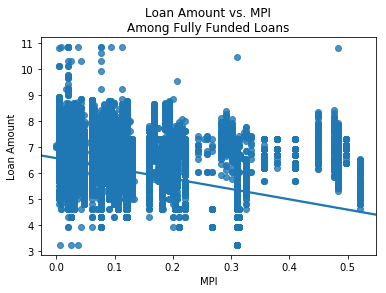

In [13]:
sns.regplot(x='MPI', y=np.log(loans.loc[loans['funded'], 'funded_amount']+1),data=loans[loans['funded']])
plt.title('Loan Amount vs. MPI\nAmong Fully Funded Loans')
plt.ylabel('Loan Amount')

Interesting that there is a negative association between the funded amount and the MPI.